## 데이터 전처리

In [235]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib
%matplotlib
import seaborn as sns

import folium
import plotly.express as px

Using matplotlib backend: module://matplotlib_inline.backend_inline


1. 원본 데이터 불러오기

In [236]:
raw_data = pd.read_csv('../data/terrorism.csv', encoding='utf-8')
raw_data.head()

/tmp/ipykernel_10109/1305434975.py:1: DtypeWarning:

Columns (4,6,19,20,25,26,30,31,32,33,34,36,40,42,44,48,50,52,56,61,62,63,65,66,67,68,74,75,76,77,78,79,80,81,83,85,87,89,90,91,92,93,94,96,99,100,101,102,107,109,110,111,112,113,114,115,116,117,118,119,120,121,122,124,131,132,133,135,136,137) have mixed types. Specify dtype option on import or set low_memory=False.



,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related,Unnamed: 135,Unnamed: 136,Unnamed: 137,Unnamed: 138,Unnamed: 139
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,0,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,-9,-9,1,1,NaN,NaN,NaN,NaN,NaN,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,-9,-9,1,1,NaN,NaN,NaN,NaN,NaN,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,-9,-9,1,1,NaN,NaN,NaN,NaN,NaN,NaN


2. 원본 데이터 복사본 terrorism 생성

In [237]:
terrorism = raw_data.copy()
terrorism.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related,Unnamed: 135,Unnamed: 136,Unnamed: 137,Unnamed: 138,Unnamed: 139
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,0,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,-9,-9,1,1,NaN,NaN,NaN,NaN,NaN,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,-9,-9,1,1,NaN,NaN,NaN,NaN,NaN,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,-9,-9,1,1,NaN,NaN,NaN,NaN,NaN,NaN


3. 데이터셋 컬럼명 변경 및 데이터 분석 시 사용할 feature 추출

In [238]:
terrorism.rename(columns={'iyear':'Year',
                          'imonth':'Month',
                          'iday':'Day',
                          'country_txt':'Country',
                          'region_txt':'Region',
                          'attacktype1_txt':'Attack_type',
                          'target1':'Target',
                          'nkill':'Killed',
                          'nwound':'Wounded',
                          'gname':'Group',
                          'targtype1_txt':'Target_type',
                          'weaptype1_txt':'Weapon_type',
                          'motive':'Motive'}, inplace=True)

terrorism=terrorism[['Year','Month','Day','Country','Region','latitude','longitude','Attack_type','Killed','Wounded','Target','Group','Target_type','Weapon_type', 'Motive']]

terrorism.head()

,Year,Month,Day,Country,Region,latitude,longitude,Attack_type,Killed,Wounded,Target,Group,Target_type,Weapon_type,Motive
0,1970,7,2,Dominican Republic,Central America & Caribbean,18.456792,-69.951164,Assassination,1,0.0,Julio Guzman,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,North America,19.371887,-99.086624,Hostage Taking (Kidnapping),0,0.0,"Nadine Chaval, daughter",23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Southeast Asia,15.478598,120.599741,Assassination,1,0.0,Employee,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Western Europe,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,East Asia,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,Unknown,Government (Diplomatic),Incendiary,NaN


4. 결측치 대체 및 제거

In [239]:
terrorism.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 15 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   Region       181691 non-null  object 
 5   latitude     177135 non-null  float64
 6   longitude    177134 non-null  float64
 7   Attack_type  181691 non-null  object 
 8   Killed       171457 non-null  object 
 9   Wounded      162699 non-null  object 
 10  Target       181048 non-null  object 
 11  Group        181246 non-null  object 
 12  Target_type  181668 non-null  object 
 13  Weapon_type  181619 non-null  object 
 14  Motive       50240 non-null   object 
dtypes: float64(2), int64(3), object(10)
memory usage: 20.8+ MB


In [240]:
terrorism['Killed'].fillna(0, inplace=True)
terrorism['Wounded'].fillna(0, inplace=True)

terrorism.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 15 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   Region       181691 non-null  object 
 5   latitude     177135 non-null  float64
 6   longitude    177134 non-null  float64
 7   Attack_type  181691 non-null  object 
 8   Killed       181691 non-null  object 
 9   Wounded      181691 non-null  object 
 10  Target       181048 non-null  object 
 11  Group        181246 non-null  object 
 12  Target_type  181668 non-null  object 
 13  Weapon_type  181619 non-null  object 
 14  Motive       50240 non-null   object 
dtypes: float64(2), int64(3), object(10)
memory usage: 20.8+ MB


/tmp/ipykernel_10109/2042425493.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/tmp/ipykernel_10109/2042425493.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' 

In [241]:
terrorism.dropna(inplace=True)

terrorism.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49541 entries, 5 to 181683
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         49541 non-null  int64  
 1   Month        49541 non-null  int64  
 2   Day          49541 non-null  int64  
 3   Country      49541 non-null  object 
 4   Region       49541 non-null  object 
 5   latitude     49541 non-null  float64
 6   longitude    49541 non-null  float64
 7   Attack_type  49541 non-null  object 
 8   Killed       49541 non-null  object 
 9   Wounded      49541 non-null  object 
 10  Target       49541 non-null  object 
 11  Group        49541 non-null  object 
 12  Target_type  49541 non-null  object 
 13  Weapon_type  49541 non-null  object 
 14  Motive       49541 non-null  object 
dtypes: float64(2), int64(3), object(10)
memory usage: 6.0+ MB


5. 'Killed'와 'Wounded' 변수 자료형 변환

In [242]:
terrorism['Killed'].value_counts()

Killed
0                                                                                                                                                                                                                                                                                                     24167
1                                                                                                                                                                                                                                                                                                     10453
2                                                                                                                                                                                                                                                                                                      3894
3                                                                                            

In [243]:
for idx, dataset in terrorism.iterrows():
    try:
        int(dataset['Killed'])
        int(dataset['Wounded'])
    except:
        terrorism.loc[idx, 'Killed'] = np.nan
        terrorism.loc[idx, 'Wounded'] = np.nan
        continue
    
terrorism.dropna(inplace=True)

In [244]:
terrorism = terrorism.astype({'Killed':'int'})
terrorism = terrorism.astype({'Wounded':'int'})

terrorism.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49414 entries, 5 to 181683
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         49414 non-null  int64  
 1   Month        49414 non-null  int64  
 2   Day          49414 non-null  int64  
 3   Country      49414 non-null  object 
 4   Region       49414 non-null  object 
 5   latitude     49414 non-null  float64
 6   longitude    49414 non-null  float64
 7   Attack_type  49414 non-null  object 
 8   Killed       49414 non-null  int64  
 9   Wounded      49414 non-null  int64  
 10  Target       49414 non-null  object 
 11  Group        49414 non-null  object 
 12  Target_type  49414 non-null  object 
 13  Weapon_type  49414 non-null  object 
 14  Motive       49414 non-null  object 
dtypes: float64(2), int64(5), object(8)
memory usage: 6.0+ MB


6. 새로운 feature 'Casualties' 추가

In [245]:
terrorism['Casualties'] = terrorism['Killed'] + terrorism['Wounded']

terrorism.head()

,Year,Month,Day,Country,Region,latitude,longitude,Attack_type,Killed,Wounded,Target,Group,Target_type,Weapon_type,Motive,Casualties
5,1970,1,1,United States,North America,37.005105,-89.176269,Armed Assault,0,0,Cairo Police Headquarters,Black Nationalists,Police,Firearms,To protest the Cairo Illinois Police Deparment,0
8,1970,1,2,United States,North America,43.076592,-89.412488,Facility/Infrastructure Attack,0,0,"R.O.T.C. offices at University of Wisconsin, M...",New Year's Gang,Military,Incendiary,To protest the War in Vietnam and the draft,0
9,1970,1,3,United States,North America,43.072950,-89.386694,Facility/Infrastructure Attack,0,0,Selective Service Headquarters in Madison Wisc...,New Year's Gang,Government (General),Incendiary,To protest the War in Vietnam and the draft,0
11,1970,1,6,United States,North America,39.758968,-104.876305,Facility/Infrastructure Attack,0,0,"Army Recruiting Station, Denver Colorado",Left-Wing Militants,Military,Incendiary,Protest the draft and Vietnam War,0
14,1970,1,9,United States,North America,18.386932,-66.061127,Facility/Infrastructure Attack,0,0,Baker's Store,Armed Commandos of Liberation,Business,Incendiary,To protest United States owned businesses in P...,0


## Step 1. 
- 데이터 전체 기간에서 테러의 숫자를 연도별로 집계하여 연도별 테러 숫자를 시각화
- 테러가 급격하게 증가하는 연도 구간을 특정짓고 그 '기점'에 세계적 이슈가 무엇이 있었는지 추측

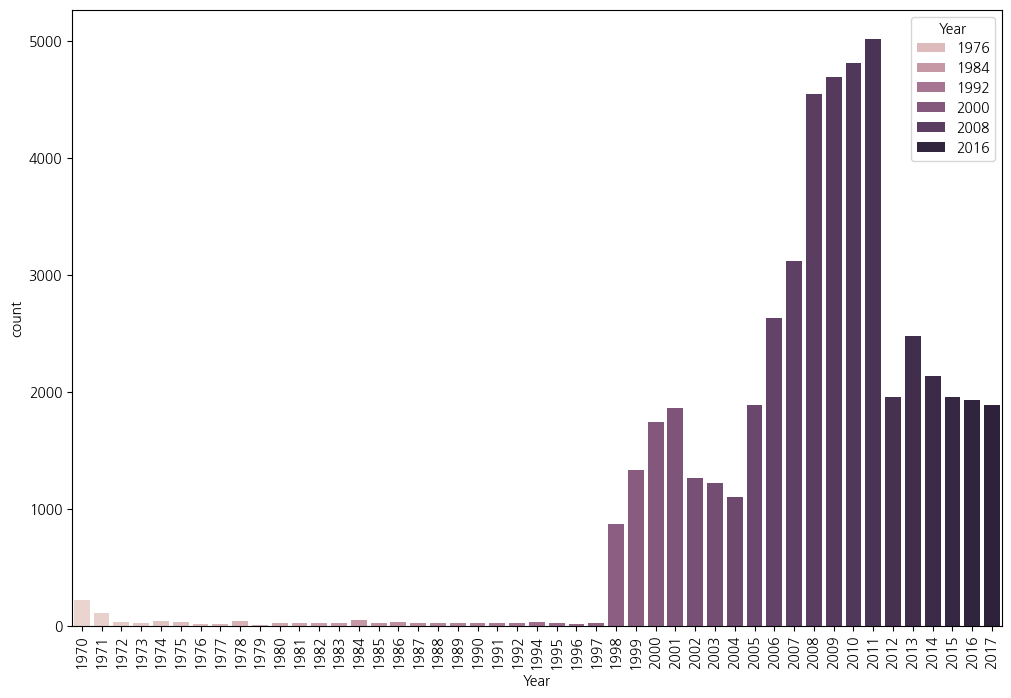

In [246]:
plt.figure(figsize=(12, 8))
sns.countplot(data=terrorism, x='Year', hue='Year')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
# 윤용곤님의 코드
# print(terrorism_year.pct_change())

In [247]:
terrorism_year = terrorism.value_counts('Year').to_frame('count')
terrorism_year.sort_index(inplace=True)

terrorism_year.rename(columns={'count':'current_count'}, inplace=True)
terrorism_year['next_count'] = terrorism_year['current_count'].shift(-1)

terrorism_year.head()

,current_count,next_count
Year,,
1970,217,111.0
1971,111,37.0
1972,37,25.0
1973,25,39.0
1974,39,32.0


In [248]:
print('년도별 테러횟수 증가율')
terrorism_year['growth_rate'] = terrorism_year['next_count'] / terrorism_year['current_count'] * 100
terrorism_year.sort_values(by='growth_rate', ascending=False, inplace=True)

terrorism_year.head()

년도별 테러횟수 증가율


,current_count,next_count,growth_rate
Year,,,
1997,26,871.0,3350.000000
1977,18,42.0,233.333333
1979,10,22.0,220.000000
1983,21,46.0,219.047619
1996,13,26.0,200.000000


< 1997년 외환위기 >
- 1997년부터 아시아 지역을 중심으로 발생했던 외환 유동성 위기를 통칭하는 말
  
분석:  
전세계 테러는 1997년도를 기점으로 갑자기 급격히 증가하였고, 1997년에 발생한 외환 위기가 테러 발생 횟수에 영향을 미쳤을 것으로 예상하였다.

## Step 2.

- 전 세계 테러 데이터를 가지고, 테러가 많이 일어난 국가를 정렬해서 상위 10위의 국가를 시각화

In [249]:
terrorism_country = terrorism.value_counts('Country').to_frame('count')
terrorism_country.sort_values(by='count', ascending=False, inplace=True)
terrorism_country = terrorism_country[:10]

terrorism_country

,count
Country,
Iraq,9362
India,5654
Pakistan,5025
Afghanistan,3537
Philippines,2327
Thailand,2033
Russia,1553
Colombia,1493
United States,1392


세계지도로 시각화

In [250]:
import geopandas as gpd
from geopandas import GeoDataFrame as gdf
path = gpd.datasets.get_path('naturalearth_lowres')
world = gpd.read_file(path) # shape file 읽기
world.head()

/tmp/ipykernel_10109/604590243.py:3: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


<Axes: >

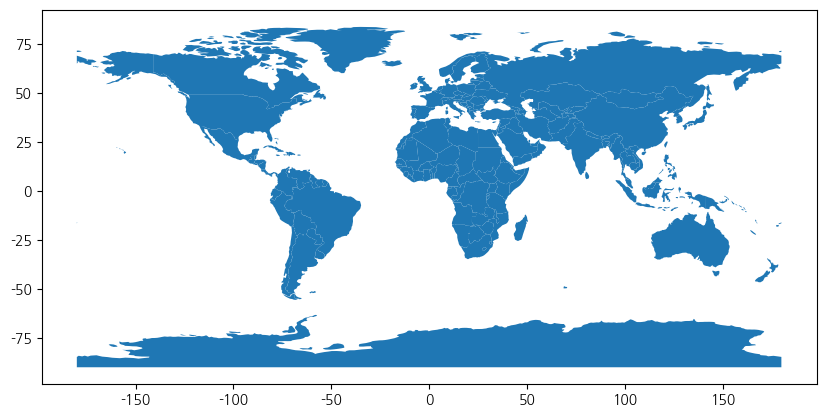

In [251]:
world.plot(figsize=(10,10))

In [252]:
for country in world.name.values.tolist():
    for c in terrorism_country.index:
        if c == country:
            print(c, ', find')
            break
        else:
            continue

Russia , find
Colombia , find
Algeria , find
Iraq , find
Thailand , find
India , find
Pakistan , find
Afghanistan , find
Philippines , find


In [253]:
world_copy = world.copy()
world_copy['name'] = world_copy['name'].replace('United States of America', 'United States')

for country in world_copy.name.values.tolist():
    for c in terrorism_country.index:
        if c == country:
            print(c, ', find')
            break
        else:
            continue
    

United States , find
Russia , find
Colombia , find
Algeria , find
Iraq , find
Thailand , find
India , find
Pakistan , find
Afghanistan , find
Philippines , find


In [254]:
world_copy['terror_count'] = None

for idx, dataset in world_copy.iterrows():
    country = dataset['name']
    
    if country in terrorism_country.index:
        world_copy['terror_count'][idx] = terrorism_country.loc[country]['count']
    else:
        world_copy['terror_count'][idx] = 0

/tmp/ipykernel_10109/2407927620.py:9: FutureWarning:

ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


/tmp/ipykernel_10109/2407927620.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the doc

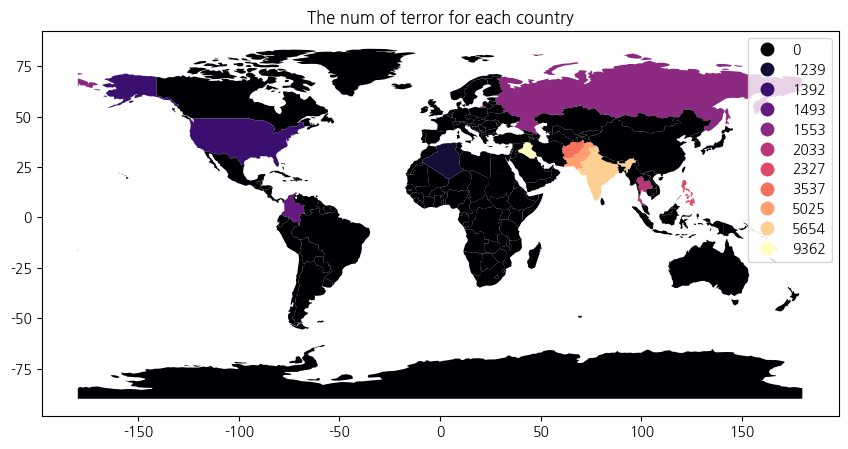

In [255]:
world_copy.plot(column='terror_count', 
                figsize=(15, 5),
                legend=True,
                cmap='magma')
 
plt.title('The num of terror for each country')
plt.show()

## 3. Step 3.

- step 1의 특정 연도 이전의 테러 경향과 그 후의 테러 경향 - 테러 발생 국, 테러 방법, 사상자 수 등등의 차이가 있는지 확인해주세요

In [256]:
terrorism_before_1997 = terrorism[terrorism['Year'] < 1997]
terrorism_after_1997 = terrorism[terrorism['Year'] >= 1997]

1. 연속형 변수 상관관계 분석

In [257]:
before_1997_simple = terrorism_before_1997[['Year', 'Month', 'Day', 'latitude', 'longitude', 'Killed', 'Wounded', 'Casualties']]
after_1997_simple = terrorism_after_1997[['Year', 'Month', 'Day', 'latitude', 'longitude', 'Killed', 'Wounded', 'Casualties']]

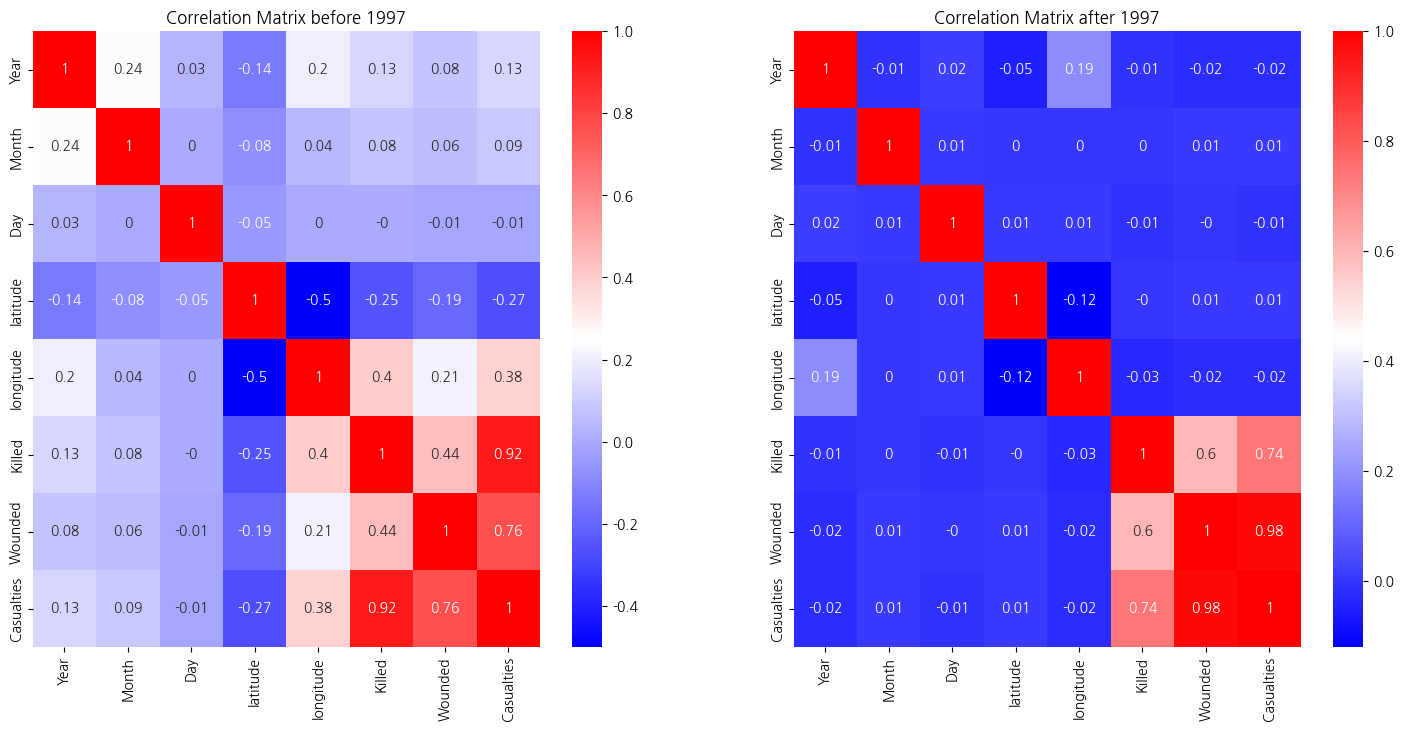

In [258]:
corr_before_1997 = before_1997_simple.corr().round(2)    
corr_after_1997 = after_1997_simple.corr().round(2) 

f, ax = plt.subplots(1, 2, figsize=(18,8))

sns.heatmap(data=corr_before_1997, ax=ax[0], annot=True, cmap='bwr')
ax[0].set_title('Correlation Matrix before 1997')


sns.heatmap(data=corr_after_1997, ax=ax[1], annot=True, cmap='bwr')
ax[1].set_title('Correlation Matrix after 1997')
ax[1].set_ylabel('')

plt.show()

>> 유의미한 상관관계를 찾을 수 없음

2. 1997년 전후로 국가별 테러 발생 횟수 비교

In [259]:
terrorism_country_b_1997 = terrorism_before_1997.value_counts('Country').to_frame('count')
terrorism_country_b_1997.sort_values(by='count', ascending=False, inplace=True)
terrorism_country_b_1997 = terrorism_country_b_1997[:10]

terrorism_country_b_1997

,count
Country,
United States,924
Sri Lanka,29
Lebanon,5
Netherlands,3
Poland,1
France,1
Guyana,1
India,1
Israel,1


In [260]:
terrorism_country_a_1997 = terrorism_after_1997.value_counts('Country').to_frame('count')
terrorism_country_a_1997.sort_values(by='count', ascending=False, inplace=True)
terrorism_country_a_1997 = terrorism_country_a_1997[:10]

terrorism_country_a_1997

,count
Country,
Iraq,9362
India,5653
Pakistan,5025
Afghanistan,3537
Philippines,2327
Thailand,2032
Russia,1553
Colombia,1493
Algeria,1239


In [261]:
world_copy['terror_count_before'] = None
world_copy['terror_count_after'] = None

# Before 1997
for idx, dataset in world_copy.iterrows():
    country = dataset['name']
    
    if country in terrorism_country_b_1997.index:
        world_copy['terror_count_before'][idx] = terrorism_country_b_1997.loc[country]['count']
    else:
        world_copy['terror_count_before'][idx] = 0

# After 1997        
for idx, dataset in world_copy.iterrows():
    country = dataset['name']
    
    if country in terrorism_country_a_1997.index:
        world_copy['terror_count_after'][idx] = terrorism_country_a_1997.loc[country]['count']
    else:
        world_copy['terror_count_after'][idx] = 0

/tmp/ipykernel_10109/3595921480.py:11: FutureWarning:

ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


/tmp/ipykernel_10109/3595921480.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the d

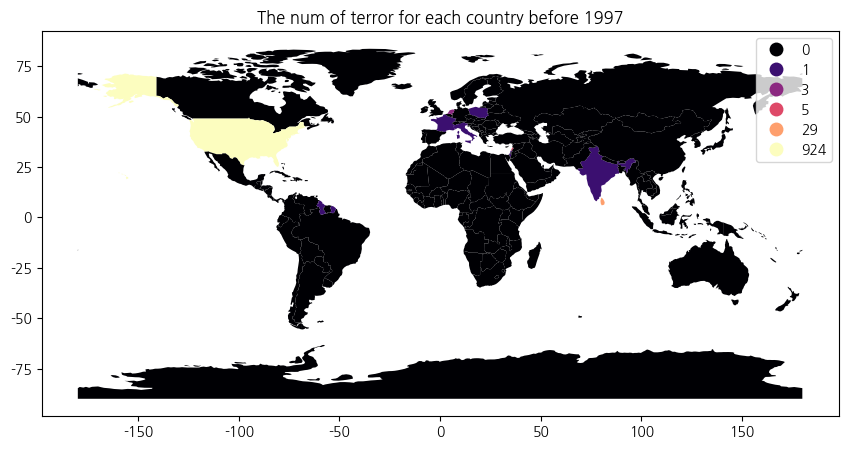

In [262]:
world_copy.plot(column='terror_count_before', 
                figsize=(15, 5),
                legend=True,
                cmap='magma')
 
plt.title('The num of terror for each country before 1997')
plt.show()

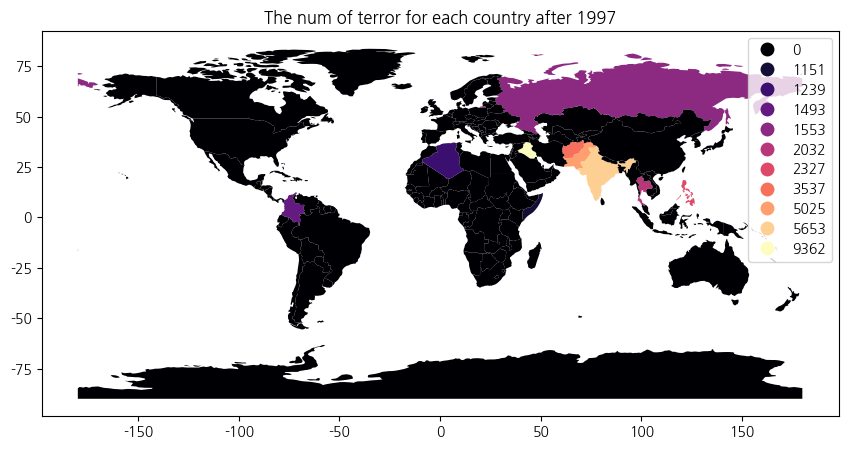

In [263]:
world_copy.plot(column='terror_count_after', 
                figsize=(15, 5),
                legend=True,
                cmap='magma')
 
plt.title('The num of terror for each country after 1997')
plt.show()

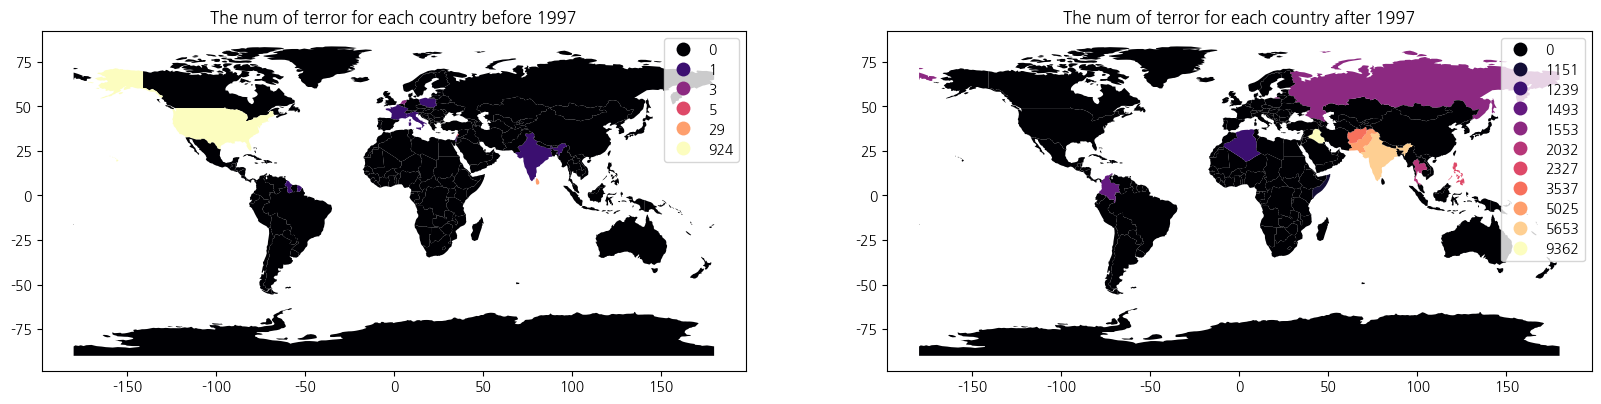

In [264]:
f, ax = plt.subplots(1, 2, figsize=(20,10))

world_copy.plot(column='terror_count_before', 
                legend=True,
                cmap='magma',
                ax=ax[0])
ax[0].set_title('The num of terror for each country before 1997')

world_copy.plot(column='terror_count_after', 
                legend=True,
                cmap='magma',
                ax=ax[1])
ax[1].set_title('The num of terror for each country after 1997')

plt.show()

3. 지역 및 국가별 테러 발생 횟수와 사상자 수 비교

In [265]:
killed_before_1997 = terrorism_before_1997.groupby(['Country','Region'])[['Year','Casualties']].agg({'Year':'count', 'Casualties':'mean'}).reset_index()
killed_before_1997 = killed_before_1997[killed_before_1997['Casualties'] > 0]
killed_before_1997.sort_values('Casualties', inplace=True)

fig = px.treemap(killed_before_1997,
                 path=['Region', 'Country'],
                 values='Year',
                 color='Casualties',
                 color_continuous_scale='viridis')

fig.show()

In [266]:
killed_after_1997 = terrorism_after_1997.groupby(['Country','Region'])[['Year','Casualties']].agg({'Year':'count', 'Casualties':'mean'}).reset_index()
killed_after_1997 = killed_after_1997[killed_after_1997['Casualties'] > 0]
killed_after_1997.sort_values('Casualties', inplace=True)

fig = px.treemap(killed_after_1997,
                 path=['Region', 'Country'],
                 values='Year',
                 color='Casualties',
                 color_continuous_scale='viridis')

fig.show()

4. 1997년 전후의 테러 방법 경향

In [267]:
terrorism_copy = terrorism.copy()

terrorism_copy['Year_cat'] = pd.cut(terrorism_copy['Year'], bins=[0, 1997, 2100], 
                                                            include_lowest=True,
                                                            labels=['before_1997', 'after_1997'])

# terrorism_copy['Casualties_cat'] = pd.cut(terrorism_copy['Casualties'], bins=[0, 10, 50, 100, 300], 
#                                                             include_lowest=True,
#                                                             labels=['0_10', '10_50', '50_100', '100_300'])

terrorism_copy.head()

,Year,Month,Day,Country,Region,latitude,longitude,Attack_type,Killed,Wounded,Target,Group,Target_type,Weapon_type,Motive,Casualties,Year_cat
5,1970,1,1,United States,North America,37.005105,-89.176269,Armed Assault,0,0,Cairo Police Headquarters,Black Nationalists,Police,Firearms,To protest the Cairo Illinois Police Deparment,0,before_1997
8,1970,1,2,United States,North America,43.076592,-89.412488,Facility/Infrastructure Attack,0,0,"R.O.T.C. offices at University of Wisconsin, M...",New Year's Gang,Military,Incendiary,To protest the War in Vietnam and the draft,0,before_1997
9,1970,1,3,United States,North America,43.072950,-89.386694,Facility/Infrastructure Attack,0,0,Selective Service Headquarters in Madison Wisc...,New Year's Gang,Government (General),Incendiary,To protest the War in Vietnam and the draft,0,before_1997
11,1970,1,6,United States,North America,39.758968,-104.876305,Facility/Infrastructure Attack,0,0,"Army Recruiting Station, Denver Colorado",Left-Wing Militants,Military,Incendiary,Protest the draft and Vietnam War,0,before_1997
14,1970,1,9,United States,North America,18.386932,-66.061127,Facility/Infrastructure Attack,0,0,Baker's Store,Armed Commandos of Liberation,Business,Incendiary,To protest United States owned businesses in P...,0,before_1997


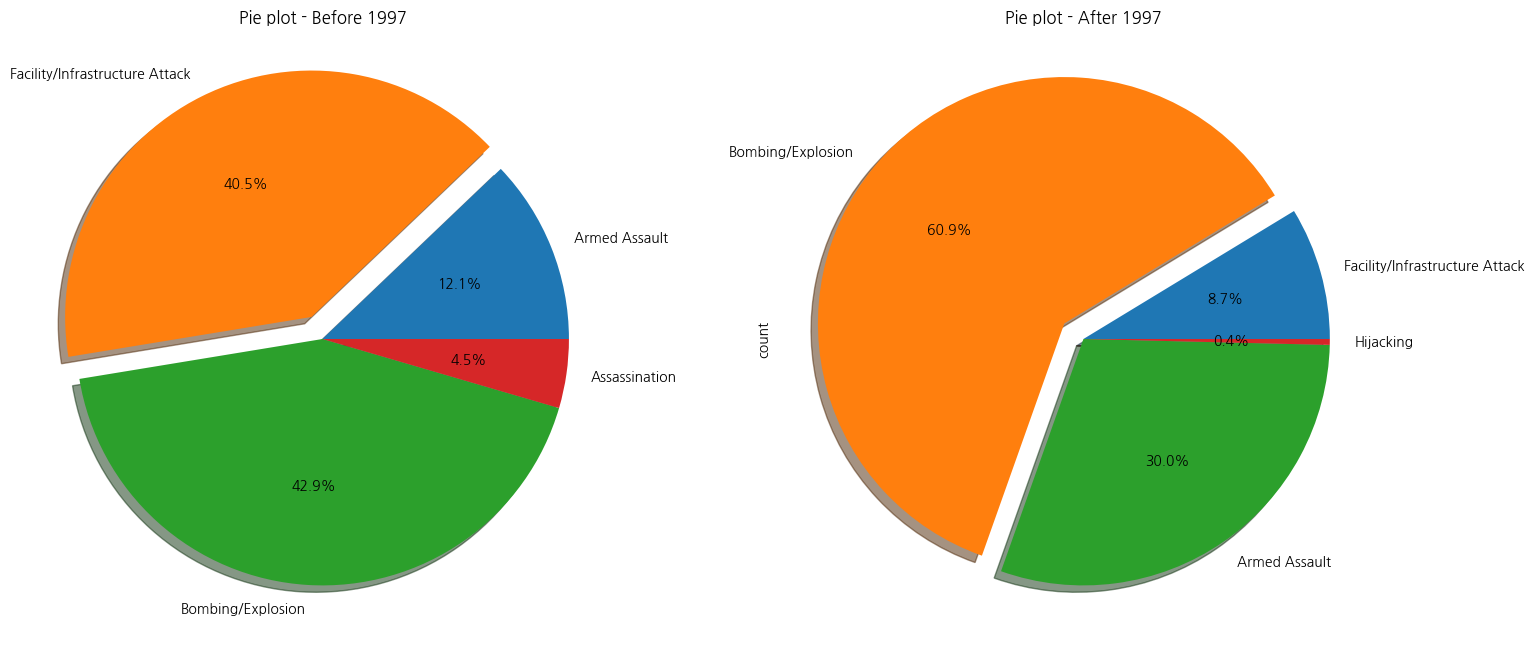

In [268]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

terrorism_before_1997['Attack_type'].value_counts(sort=False)[:4].plot.pie(explode=[0, 0.1, 0, 0],
                                                                           autopct='%1.1f%%', 
                                                                           ax=ax[0], 
                                                                           shadow=True)

ax[0].set_title('Pie plot - Before 1997')
ax[0].set_ylabel('')

terrorism_after_1997['Attack_type'].value_counts(sort=False)[:4].plot.pie(explode=[0, 0.1, 0, 0],
                                                                          autopct='%1.1f%%', 
                                                                          ax=ax[1], 
                                                                          shadow=True)
ax[1].set_title('Pie plot - After 1997')

plt.show()

5. 1997년 전후의 테러 대상 경향

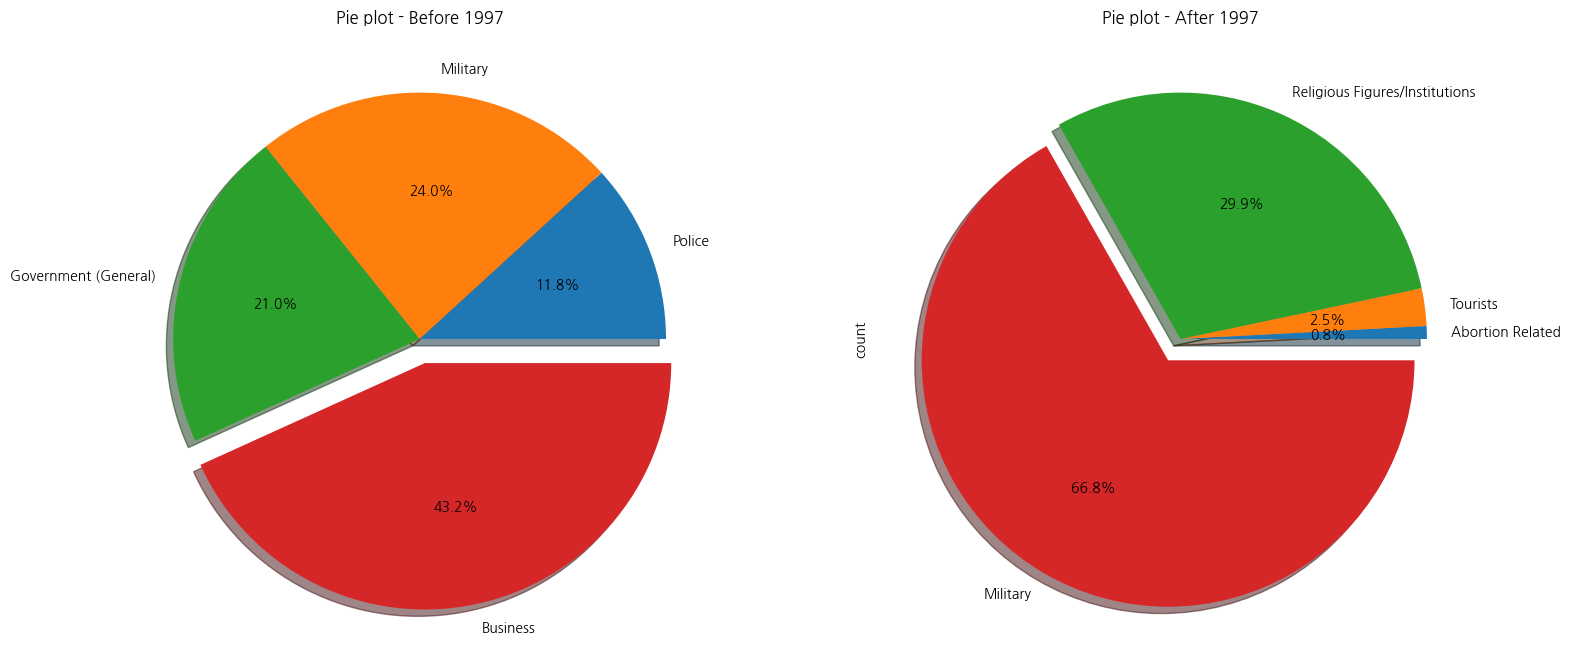

In [269]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

terrorism_before_1997['Target_type'].value_counts(sort=False)[:4].plot.pie(explode=[0, 0, 0, 0.1],
                                                                           autopct='%1.1f%%', 
                                                                           ax=ax[0], 
                                                                           shadow=True)

ax[0].set_title('Pie plot - Before 1997')
ax[0].set_ylabel('')

terrorism_after_1997['Target_type'].value_counts(sort=False)[:4].plot.pie(explode=[0, 0, 0, 0.1],
                                                                          autopct='%1.1f%%', 
                                                                          ax=ax[1], 
                                                                          shadow=True)
ax[1].set_title('Pie plot - After 1997')

plt.show()

## Step 4.

- 중동&북아프리카 지역과 남아메리카, 서유럽, 남동아시아 총 4개의 지역별로 테러 공격 형태, 사망자와 사상자의 수 등에 대해 각 지역별로 어떤 특성이 있는지 확인하세요

In [270]:
terrorism['Region'].value_counts()

Region
South Asia                     16679
Middle East & North Africa     15017
Southeast Asia                  5099
Sub-Saharan Africa              4178
Western Europe                  2455
Eastern Europe                  2196
South America                   1763
North America                   1511
Central Asia                     233
East Asia                        157
Central America & Caribbean       73
Australasia & Oceania             53
Name: count, dtype: int64

In [271]:
condition = (
    (terrorism['Region'] == 'Middle East & North Africa')|
    (terrorism['Region'] == 'South America')|
    (terrorism['Region'] == 'Western Europe')|
    (terrorism['Region'] == 'Southeast Asia')
)

terrorism_region = terrorism.loc[condition]

terrorism_region.head()


,Year,Month,Day,Country,Region,latitude,longitude,Attack_type,Killed,Wounded,Target,Group,Target_type,Weapon_type,Motive,Casualties
1261,1972,3,15,Italy,Western Europe,45.463681,9.188171,Bombing/Explosion,1,0,Electrical Pylon,Unknown,Utilities,Explosives,The motive for this specific attack is unknown...,1
2955,1975,4,13,Lebanon,Middle East & North Africa,33.802845,35.589649,Armed Assault,22,0,Palestinian Militants,Phalange,Terrorists/Non-State Militia,Firearms,In retaliation for the shooting of four Phalan...,22
3431,1975,12,2,Netherlands,Western Europe,52.859490,6.517689,Armed Assault,3,0,Country Train,South Moluccans,Unknown,Firearms,The South Moluccans wanted the Netherlands to ...,3
4807,1977,5,23,Netherlands,Western Europe,53.076694,6.617635,Armed Assault,8,0,Train,South Moluccans,Unknown,Firearms,Obtain the freedom for 21 comrades in Dutch ja...,8
4808,1977,5,23,Netherlands,Western Europe,52.977867,6.478378,Armed Assault,0,0,School,South Moluccans,Educational Institution,Firearms,Obtain the freedom for 21 comrades in Dutch ja...,0


1. 지역별 사상자에 대한 사망자의 비율

In [272]:
terrorism_region['Killed_Casualties_rate'] = (terrorism_region['Killed'] / (terrorism_region['Casualties'] + 1e-6)).round(2)

terrorism_region.head()

/tmp/ipykernel_10109/2124719306.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Year,Month,Day,Country,Region,latitude,longitude,Attack_type,Killed,Wounded,Target,Group,Target_type,Weapon_type,Motive,Casualties,Killed_Casualties_rate
1261,1972,3,15,Italy,Western Europe,45.463681,9.188171,Bombing/Explosion,1,0,Electrical Pylon,Unknown,Utilities,Explosives,The motive for this specific attack is unknown...,1,1.0
2955,1975,4,13,Lebanon,Middle East & North Africa,33.802845,35.589649,Armed Assault,22,0,Palestinian Militants,Phalange,Terrorists/Non-State Militia,Firearms,In retaliation for the shooting of four Phalan...,22,1.0
3431,1975,12,2,Netherlands,Western Europe,52.859490,6.517689,Armed Assault,3,0,Country Train,South Moluccans,Unknown,Firearms,The South Moluccans wanted the Netherlands to ...,3,1.0
4807,1977,5,23,Netherlands,Western Europe,53.076694,6.617635,Armed Assault,8,0,Train,South Moluccans,Unknown,Firearms,Obtain the freedom for 21 comrades in Dutch ja...,8,1.0
4808,1977,5,23,Netherlands,Western Europe,52.977867,6.478378,Armed Assault,0,0,School,South Moluccans,Educational Institution,Firearms,Obtain the freedom for 21 comrades in Dutch ja...,0,0.0


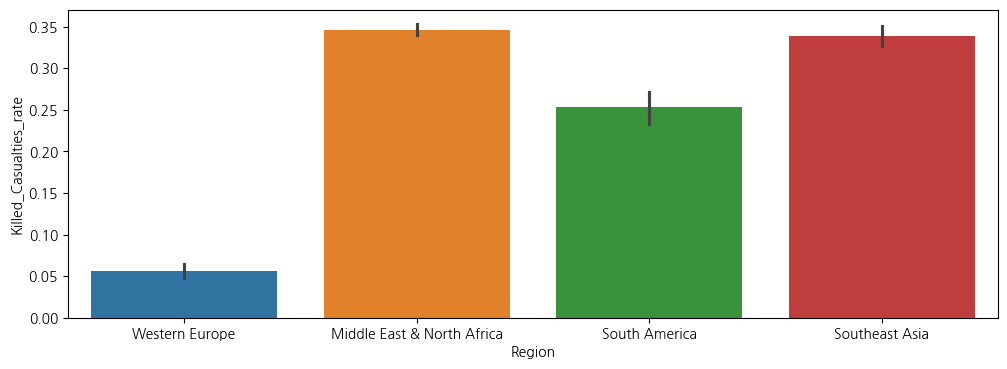

In [273]:
plt.figure(figsize=(12, 4))
sns.barplot(data=terrorism_region, x='Region', y='Killed_Casualties_rate', hue='Region')

plt.show()

2. 테러 대상별 4개의 지역에 따른 사망자 누적 분포

In [274]:
grouped_terrorism_region = terrorism_region.groupby(['Target_type', 'Region'])['Killed'].agg('mean').to_frame()
grouped_terrorism_region.head()

Killed
Target_type         Region                              
Airports & Aircraft Middle East & North Africa  1.911111
                    South America               0.062500
                    Southeast Asia              2.428571
                    Western Europe              0.950000
Business            Middle East & North Africa  3.087674

In [275]:
display(grouped_terrorism_region.unstack(1))

Killed                \
Region                         Middle East & North Africa South America   
Target_type                                                               
Airports & Aircraft                              1.911111      0.062500   
Business                                         3.087674      0.570988   
Educational Institution                          1.827068      0.529412   
Food or Water Supply                             2.050000      0.428571   
Government (Diplomatic)                          1.405286      0.428571   
Government (General)                             1.901810      1.111554   
Journalists & Media                              0.934673      0.431373   
Maritime                                         2.714286      1.500000   
Military                                         5.411727      3.884211   
NGO                                              1.055556      0.312500   
Other                                            3.568182           NaN   
Police                                           3.334764      3.142857   
Private Citizens & Property                      4.385568      2.907285   
Religious Figures/Institutions                   5.204147      3.292683   
Telecommunication                                0.526316      0.200000   
Terrorists/Non-State Militia                     3.019139      2.500000   
Tourists                                         4.075472      1.100000   
Transportation                                   3.118451      0.619048   
Unknown                                          0.811966      0.363636   
Utilities                                        0.807512      0.382166   
Violent Political Party                          2.733333           NaN   

                                                              
Region                         Southeast Asia Western Europe  
Target_type                                                   
Airports & Aircraft                  2.428571       0.950000  
Business                             0.884521       0.296959  
Educational Institution              0.480315       0.607143  
Food or Water Supply                 0.181818       0.000000  
Government (Diplomatic)              1.000000       0.066667  
Government (General)                 0.795422       0.142857  
Journalists & Media                  0.444444       0.634615  
Maritime                             9.190476       0.000000  
Military                             1.638554       0.339286  
NGO                                  0.631579       0.000000  
Other                                1.000000       0.000000  
Police                               1.133772       0.177866  
Private Citizens & Property          1.349794       0.453978  
Religious Figures/Institutions       0.906250       0.056604  
Telecommunication                    0.075630       0.000000  
Terrorists/Non-State Militia         1.344828       0.636364  
Tourists                             2.625000       0.071429  
Transportation                       0.843750       2.650000  
Unknown                              0.050847       0.390244  
Utilities                            0.032258       0.100000  
Violent Political Party              0.400000       0.333333

<Axes: ylabel='Target_type'>

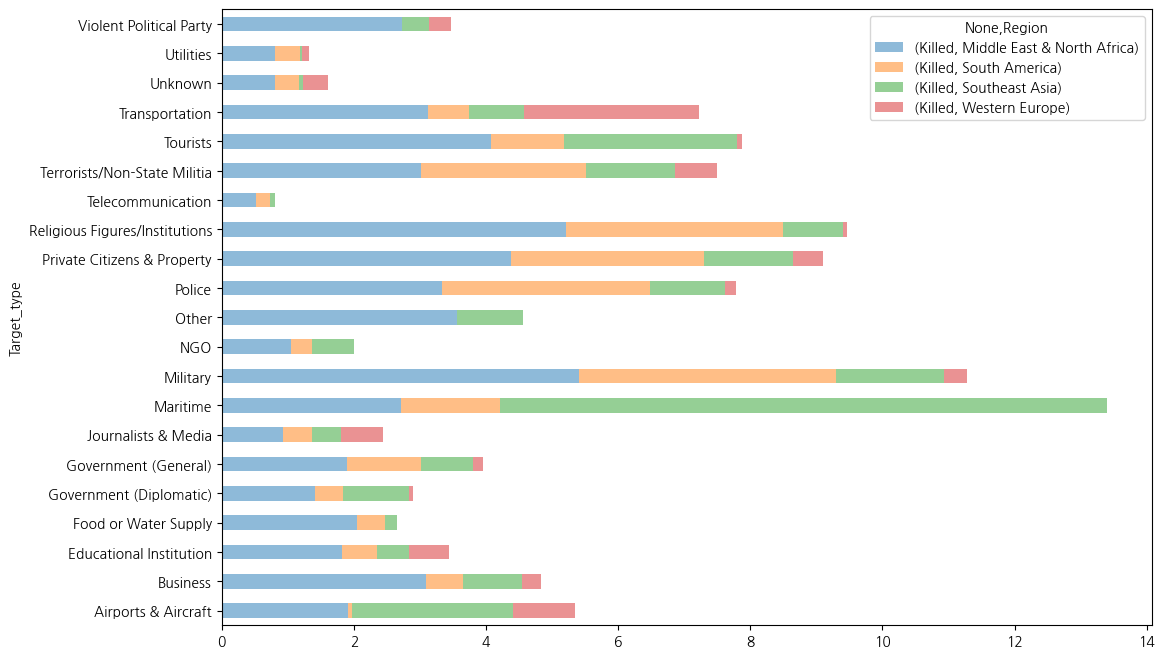

In [276]:
grouped_terrorism_region.unstack(1).plot.barh(stacked=True, alpha=0.5, figsize=(12,8))

## Step 5.

- 테러의 위험성 알리기

[ 가설: 막대한 경제적 손실 ]  
경제 위기가 발생하였을 때, 테러 발생 수가 급격하게 증가하였다. 테러 발생 시, 막대한 재산 피해가 생기고, 이는 다시 국가 경제력 약화와 함께 테러 발생이 잦아질 것이다. 따라서 테러가 인하여 엄청난 경제적 손해가 불가피함을 인지하고, 테러의 위험성을 간과하지 않아야 한다.

In [277]:
terror = raw_data.copy()

terror.rename(columns={'iyear':'Year',
                          'imonth':'Month',
                          'iday':'Day',
                          'country_txt':'Country',
                          'region_txt':'Region',
                          'attacktype1_txt':'Attack_type',
                          'target1':'Target',
                          'nkill':'Killed',
                          'nwound':'Wounded',
                          'gname':'Group',
                          'targtype1_txt':'Target_type',
                          'weaptype1_txt':'Weapon_type',
                          'motive':'Motive',
                          'propvalue':'Property'}, inplace=True)

terror=terror[['Year', 'Country','Region', 'Property', 'Attack_type','Killed','Wounded', 'Target_type','Weapon_type', 'Motive']]

terror.head()

,Year,Country,Region,Property,Attack_type,Killed,Wounded,Target_type,Weapon_type,Motive
0,1970,Dominican Republic,Central America & Caribbean,NaN,Assassination,1,0.0,Private Citizens & Property,Unknown,NaN
1,1970,Mexico,North America,NaN,Hostage Taking (Kidnapping),0,0.0,Government (Diplomatic),Unknown,NaN
2,1970,Philippines,Southeast Asia,NaN,Assassination,1,0.0,Journalists & Media,Unknown,NaN
3,1970,Greece,Western Europe,NaN,Bombing/Explosion,NaN,NaN,Government (Diplomatic),Explosives,NaN
4,1970,Japan,East Asia,NaN,Facility/Infrastructure Attack,NaN,NaN,Government (Diplomatic),Incendiary,NaN


In [278]:
terror.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Year         181691 non-null  int64 
 1   Country      181691 non-null  object
 2   Region       181691 non-null  object
 3   Property     39662 non-null   object
 4   Attack_type  181691 non-null  object
 5   Killed       171457 non-null  object
 6   Wounded      162699 non-null  object
 7   Target_type  181668 non-null  object
 8   Weapon_type  181619 non-null  object
 9   Motive       50240 non-null   object
dtypes: int64(1), object(9)
memory usage: 13.9+ MB


In [279]:
terror['Property'].value_counts()

Property
 -99                            27213
-99.0                            1285
 50000                           1132
 10000                            747
 Minor (likely < $1 million)      738
                                ...  
 14500                              1
 988                                1
 32700                              1
 13500                              1
 461100                             1
Name: count, Length: 649, dtype: int64

In [280]:
terror['Killed'].fillna(0, inplace=True)
terror['Wounded'].fillna(0, inplace=True)

terror.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Year         181691 non-null  int64 
 1   Country      181691 non-null  object
 2   Region       181691 non-null  object
 3   Property     39662 non-null   object
 4   Attack_type  181691 non-null  object
 5   Killed       181691 non-null  object
 6   Wounded      181691 non-null  object
 7   Target_type  181668 non-null  object
 8   Weapon_type  181619 non-null  object
 9   Motive       50240 non-null   object
dtypes: int64(1), object(9)
memory usage: 13.9+ MB


/tmp/ipykernel_10109/1297289507.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/tmp/ipykernel_10109/1297289507.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' 

데이터 전처리 이후, 데이터셋 크기가 급격하게 작아짐. 
따라서, 유의미한 분석이 불가능함...

>> 가설 입증은 다음 기회에...